In [1]:
!pip install --upgrade google-cloud-speech

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 234.6/234.6 KB 4.8 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

working_dir = '/content/drive/MyDrive/Blog/speech-to-text'

# 作業ディレクトリに移動
%cd {working_dir}

Mounted at /content/drive
/content/drive/MyDrive/Blog/speech-to-text


In [29]:
import os

voice_file_path = 'sample_voice_1A.wav'
api_key_path = 'secret_key.json'

os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = api_key_path

In [13]:
import wave

# サンプリングレート確認
with wave.open(voice_file_path, 'rb') as f:
    fr = f.getframerate()
    print("サンプリングレート: ", fr)

サンプリングレート:  44100


In [5]:
import io

from google.cloud import speech


with io.open(voice_file_path, 'rb') as f:
    content = f.read()

audio = speech.RecognitionAudio(content=content)

config = speech.RecognitionConfig(
    encoding=speech.RecognitionConfig.AudioEncoding.LINEAR16,
    sample_rate_hertz=44100,
    language_code='ja-JP')

client = speech.SpeechClient()
response = client.recognize(config=config, audio=audio)

for result in response.results:
    print(result.alternatives[0].transcript)

今日は天気も良くてとても気分の良い日だったね


In [30]:
# 句読点の出力を含む処理
import io
from google.cloud import speech

client = speech.SpeechClient()

path = voice_file_path

with io.open(path, "rb") as audio_file:
    content = audio_file.read()

audio = speech.RecognitionAudio(content=content)
config = speech.RecognitionConfig(
    encoding=speech.RecognitionConfig.AudioEncoding.LINEAR16,
    sample_rate_hertz=44100,
    language_code="ja-JP",
    # Enable automatic punctuation
    enable_automatic_punctuation=True,
)

response = client.recognize(config=config, audio=audio)

for i, result in enumerate(response.results):
    alternative = result.alternatives[0]
    print("-" * 20)
    print("First alternative of result {}".format(i))
    print("Transcript: {}".format(alternative.transcript))


--------------------
First alternative of result 0
Transcript: 東京都は13日、新型コロナウイルスに関する独自の警戒度について、感染状況のレベルを2週連続で引き上げ4段階の内上から2番目とした医療提供体制のレベルも引き上げ下から2番目でした。


In [35]:
from google.cloud import language_v1

import re

# Instantiates a client
client = language_v1.LanguageServiceClient()

# The text to analyze
sorce = '東京都は13日、新型コロナウイルスに関する独自の警戒度について、感染状況のレベルを2週連続で引き上げ、4段階の内上から2番目とした。医療提供体制のレベルも引き上げ、下から2番目でした。'

# 総合値の初期化
allscore = 0
allmag = 0
ydata = []
st = []

text = re.split('[。、.,]',sorce) #テキストソースの分割設定
text = list(filter(None, text)) #空配列の削除

for index in range(len(text)):
  document = language_v1.Document(
      content=text[index], type_=language_v1.Document.Type.PLAIN_TEXT
  )

  # Detects the sentiment of the text
  sentiment = client.analyze_sentiment(
      request={"document": document}
  ).document_sentiment

  print("Text: {}".format(text[index]))
  print("Sentiment-Score: {}\n".format(sentiment.score))
  # print("Sentiment-Score: {}\nSentiment-Magnitude: {}".format(sentiment.score, sentiment.magnitude))
  # print('\n')
  ydata.append(sentiment.score)
  st.append(text[index])
  allscore += sentiment.score
  allmag += sentiment.magnitude


print("All-Text: {}".format(text))
print("All-Sentiment-Score: {}".format((allscore)/(len(text))))
# print("All-Sentiment-Score: {}\nAll-Sentiment-Magnitude: {}".format(allscore/(len(text)), allmag))

Text: 東京都は13日
Sentiment-Score: 0.0

Text: 新型コロナウイルスに関する独自の警戒度について
Sentiment-Score: -0.20000000298023224

Text: 感染状況のレベルを2週連続で引き上げ
Sentiment-Score: -0.4000000059604645

Text: 4段階の内上から2番目とした
Sentiment-Score: 0.0

Text: 医療提供体制のレベルも引き上げ
Sentiment-Score: 0.4000000059604645

Text: 下から2番目でした
Sentiment-Score: 0.0

All-Text: ['東京都は13日', '新型コロナウイルスに関する独自の警戒度について', '感染状況のレベルを2週連続で引き上げ', '4段階の内上から2番目とした', '医療提供体制のレベルも引き上げ', '下から2番目でした']
All-Sentiment-Score: -0.033333333830038704


In [8]:
# 日本語対応用モジュール
! pip install japanize-matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 61.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120275 sha256=70088da102cbe596729b9a38cfe29cf215d5cdac59c66e0f566ffa6b4b7392a9
  Stored in directory: /root/.cache/pip/wheels/4f/ca/96/4cc5e192421cceb077fbf4ffec533382edd416fd3fa0af0bbd
Successfully built japanize-matplotlib


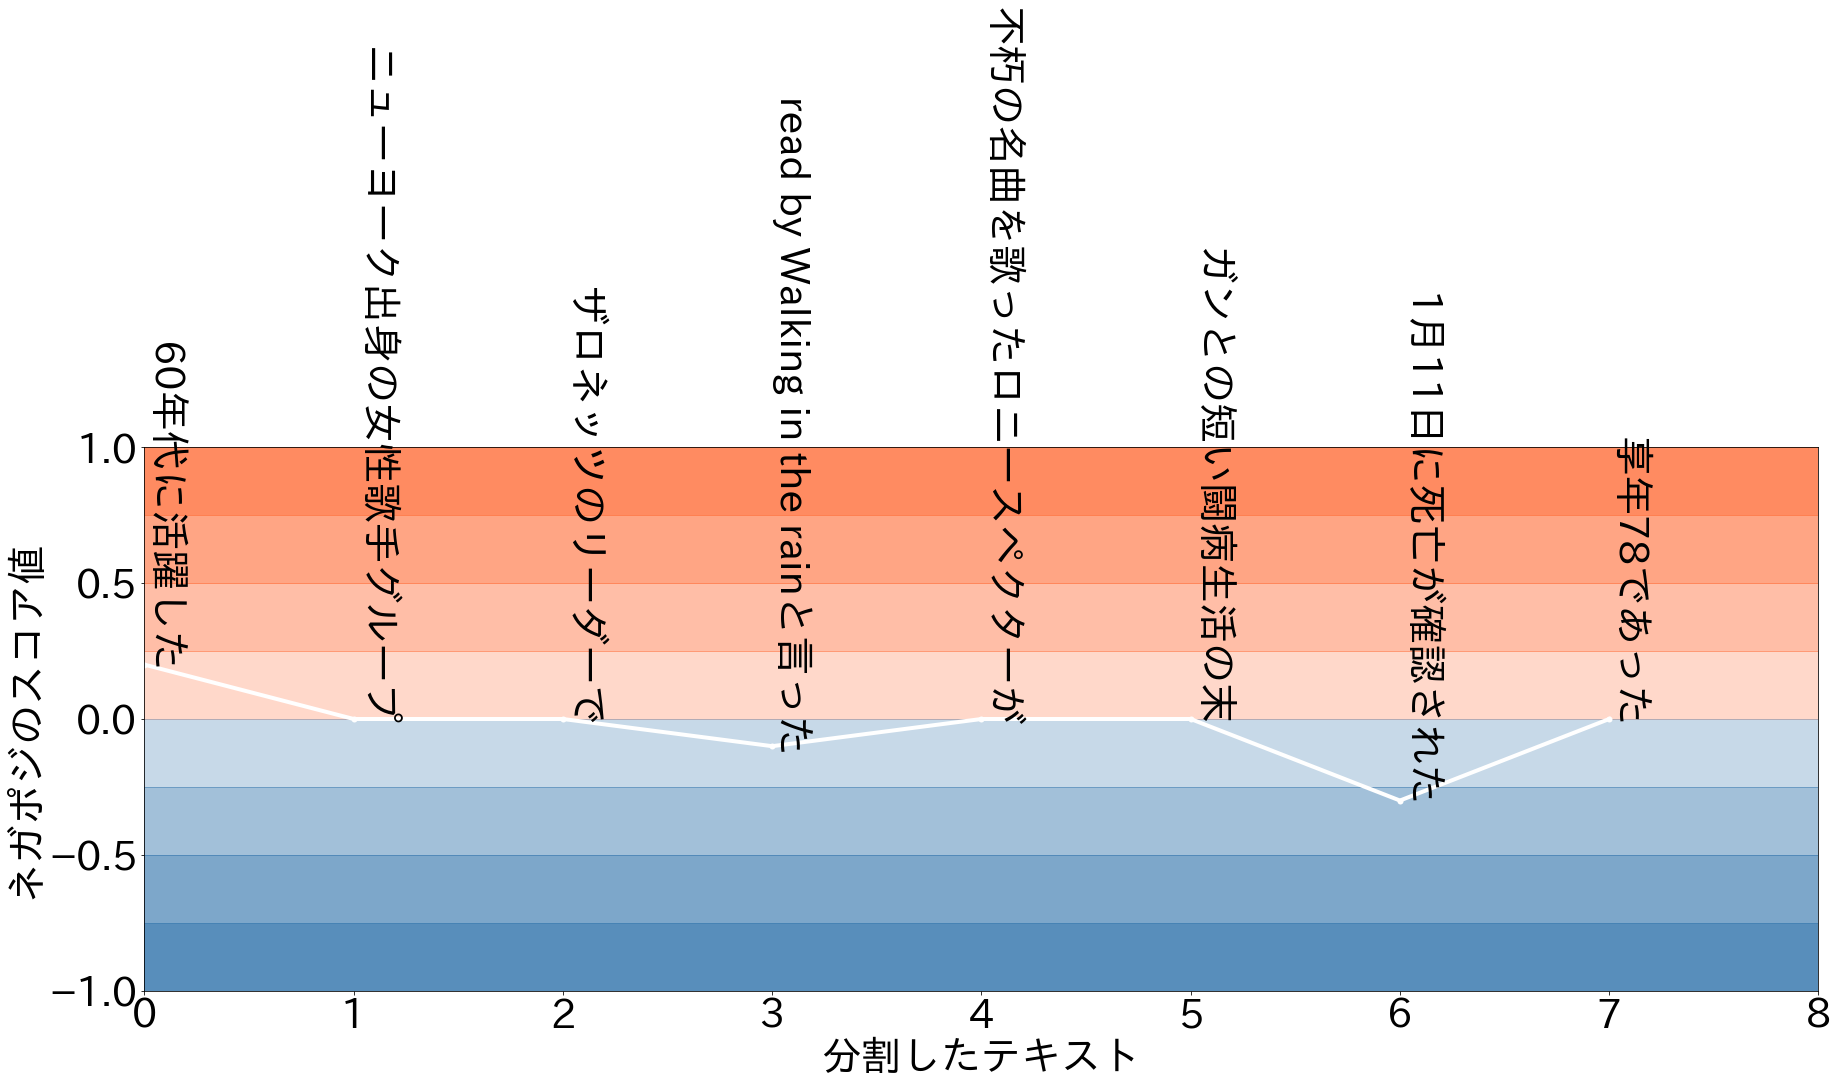

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import japanize_matplotlib

time = []

# 描画サイズの設定
plt.figure(figsize=[30,10])

for i in range(len(text)):
  time.append(i)

# 折れ線グラフを出力
plt.rcParams["font.size"] = 40
plt.plot(time, ydata, marker="o", markeredgewidth=0, color="white", lw=4)
plt.xlim(0,len(time))
plt.ylim(-1,1)
plt.xlabel("分割したテキスト")
plt.ylabel("ネガポジのスコア値")


#plt.hlines(0,0,len(text)-1,color='black', lw=3) #中央線


# 分割テキストソースの出力
for j in range(len(text)):
    pyplot.text(time[j], ydata[j], st[j], rotation=270, size=40)

pyplot.axhspan(0.0, 0.25, color="coral", alpha=0.3, label="0.0-0.1")
pyplot.axhspan(0.25, 0.5, color="coral", alpha=0.5, label="0.0-0.1")
pyplot.axhspan(0.5, 0.75, color="coral", alpha=0.7, label="0.0-0.1")
pyplot.axhspan(0.75, 1.0, color="coral", alpha=0.9, label="0.0-0.1")

pyplot.axhspan(0.0, -0.25, color="steelblue", alpha=0.3, label="0.0-0.1")
pyplot.axhspan(-0.25, -0.5, color="steelblue", alpha=0.5, label="0.0-0.1")
pyplot.axhspan(-0.5, -0.75, color="steelblue", alpha=0.7, label="0.0-0.1")
pyplot.axhspan(-0.75, -1.0, color="steelblue", alpha=0.9, label="0.0-0.1")

plt.show()